In [1]:
import matplotlib.pyplot as plt
import cv2
from count_spots import count_spots

142


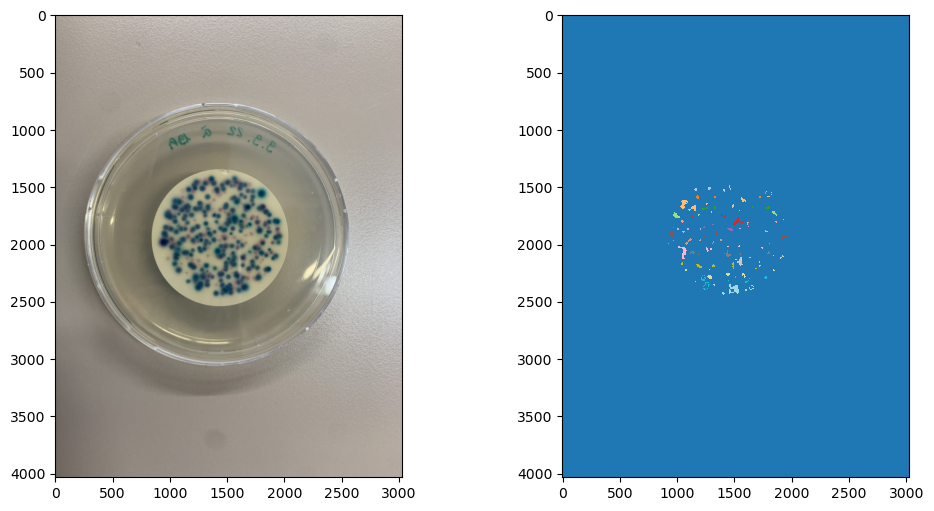

In [2]:
bgr_img = cv2.imread('data/22-09-09_19h.JPG')
count, labels = count_spots(bgr_img)
print(count)

rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB )

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(rgb_img)
ax[1].imshow(labels,cmap='tab20',interpolation='nearest')